In [1]:
import data
from keras.models import Model # basic class for specifying and training a neural network
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Convolution2D, MaxPooling2D, Dropout
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
from keras.regularizers import l2 # L2-regularisation
from keras.layers.normalization import BatchNormalization # batch normalisation
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Baseline model
num_classes = 10
# Each image is 8 by 8 pixels and is represented as a vector of dimension 64 
# by listing all the pixel values in raster scan order. The images are grayscale 
# and the pixel values are between 0 and 1.
train_data, train_labels, test_data, test_labels = data.load_all_data('data')
train_labels = np_utils.to_categorical(train_labels, num_classes) # One-hot encode the labels
test_labels = np_utils.to_categorical(test_labels, num_classes) # One-hot encode the labels

model = Sequential()
model.add(Dense(64, input_dim=64, kernel_initializer='normal', activation='relu')) # rectifier activation function
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_data, train_labels, epochs=12, batch_size=200, verbose=1, validation_split=0.1)
model.evaluate(test_data, test_labels, verbose=1) # test accuracy 0.924

Train on 6300 samples, validate on 700 samples
Epoch 1/12
6300/6300 [==============================] - 0s 41us/step - loss: 2.2189 - acc: 0.3456 - val_loss: 2.1039 - val_acc: 0.5114
Epoch 2/12
6300/6300 [==============================] - 0s 14us/step - loss: 1.8959 - acc: 0.6919 - val_loss: 1.6916 - val_acc: 0.6986
Epoch 3/12
6300/6300 [==============================] - 0s 14us/step - loss: 1.4097 - acc: 0.7930 - val_loss: 1.2373 - val_acc: 0.7757
Epoch 4/12
6300/6300 [==============================] - 0s 14us/step - loss: 0.9929 - acc: 0.8478 - val_loss: 0.9114 - val_acc: 0.8143
Epoch 5/12
6300/6300 [==============================] - 0s 14us/step - loss: 0.7231 - acc: 0.8705 - val_loss: 0.7104 - val_acc: 0.8414
Epoch 6/12
6300/6300 [==============================] - 0s 14us/step - loss: 0.5636 - acc: 0.8887 - val_loss: 0.5891 - val_acc: 0.8600
Epoch 7/12
6300/6300 [==============================] - 0s 14us/step - loss: 0.4662 - acc: 0.9029 - val_loss: 0.5104 - val_acc: 0.8743
Epoch 8/

[0.295832428753376, 0.92425]

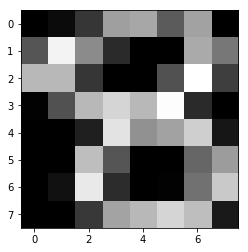

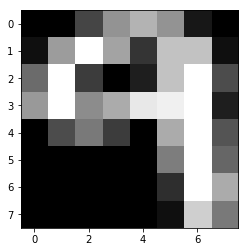

In [20]:
Xdat = train_data.reshape(train_data.shape[0], height, width)
plt.imshow(Xdat[4], cmap=plt.get_cmap('gray'))
plt.show()
plt.imshow(Xdat[5], cmap=plt.get_cmap('gray'))
plt.show()

In [3]:
height, width, depth = 8, 8, 1
train_data = train_data.reshape(train_data.shape[0], height, width, depth)
test_data = test_data.reshape(test_data.shape[0], height, width, depth)

kernel_size = 3 # we will use 3x3 kernels throughout
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth = 32 # use 32 kernels in both convolutional layers
drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
drop_prob_2 = 0.5 # dropout in the FC layer with probability 0.5
hidden_size = 128 # there will be 128 neurons in both hidden layers
l2_lambda = 0.0001 # use 0.0001 as a L2-regularisation factor

In [12]:
print(train_data.shape)
print(train_labels.shape)

(7000, 8, 8, 1)
(7000, 10)


In [5]:
inp = Input(shape=(height, width, depth)) # N.B. TensorFlow back-end expects channel dimension last
conv_1 = Convolution2D(conv_depth, (kernel_size, kernel_size), padding='same', kernel_initializer='he_uniform', 
                       kernel_regularizer=l2(l2_lambda), activation='relu')(inp)
conv_2 = Convolution2D(conv_depth, (kernel_size, kernel_size), padding='same', kernel_initializer='he_uniform', 
                       kernel_regularizer=l2(l2_lambda), activation='relu')(conv_1)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2) # pooling layer
drop_1 = Dropout(drop_prob_1)(pool_1) # a regularization layer using dropout
flat = Flatten()(drop_1) # converts the 2D matrix data to a vector
hidden = Dense(hidden_size, activation='relu')(flat) # Hidden ReLU layer
drop = Dropout(drop_prob_2)(hidden)
out = Dense(num_classes, activation='softmax')(drop) # Output softmax layer
model = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers

In [9]:
model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

model.fit(train_data, train_labels,
          batch_size=300, epochs=12,
          verbose=1, validation_split=0.1) # 10% data for validation
model.evaluate(test_data, test_labels, verbose=1) # test loss 0.05, test accuracy 0.98925

Train on 6300 samples, validate on 700 samples
Epoch 1/12
6300/6300 [==============================] - 2s 365us/step - loss: 0.0493 - acc: 0.9911 - val_loss: 0.0743 - val_acc: 0.9857
Epoch 2/12
6300/6300 [==============================] - 1s 232us/step - loss: 0.0563 - acc: 0.9863 - val_loss: 0.0687 - val_acc: 0.9871
Epoch 3/12
6300/6300 [==============================] - 1s 233us/step - loss: 0.0479 - acc: 0.9902 - val_loss: 0.0679 - val_acc: 0.9857
Epoch 4/12
6300/6300 [==============================] - 1s 234us/step - loss: 0.0457 - acc: 0.9908 - val_loss: 0.0714 - val_acc: 0.9871
Epoch 5/12
6300/6300 [==============================] - 2s 243us/step - loss: 0.0457 - acc: 0.9894 - val_loss: 0.0725 - val_acc: 0.9857
Epoch 6/12
6300/6300 [==============================] - 1s 234us/step - loss: 0.0441 - acc: 0.9905 - val_loss: 0.0730 - val_acc: 0.9871
Epoch 7/12
6300/6300 [==============================] - 1s 236us/step - loss: 0.0497 - acc: 0.9897 - val_loss: 0.0737 - val_acc: 0.9857
E

[0.053265751853585244, 0.98925]